In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling

In [4]:
# Define your scaling function
def custom_scaling(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Define your scaling function
def custom_scaling_1(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    # input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Define

In [ ]:
# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_13x13x13x13.csv")

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6


# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw', 't_dt']].values
X_scaled = custom_scaling(X)
# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [16, 32, 64, 128]  # Number of neurons per hidden layer

# Modular

## delta_current,delta_voltage

In [5]:
# Extract output (ripples)
# y_1 = df_1[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset
y_1 = df[["delta_current", "delta_voltage"]].values
# Define custom scaling ranges for each input feature

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train_1, y_temp_1     = train_test_split(X_scaled, y_1, test_size=0.3, random_state=42)
X_val, X_test, y_val_1, y_test_1 = train_test_split(X_temp, y_temp_1, test_size=0.5, random_state=42)

histories_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_1 = {}
maes_1 = {}
rmses_1= {}
r2_scores_1 = {}
mapes_1 = {}




Epoch 1/100, Loss: 11.161690711975098, Val Loss: 8.833044052124023
Epoch 2/100, Loss: 7.611343860626221, Val Loss: 6.322249412536621
Epoch 3/100, Loss: 6.770015239715576, Val Loss: 5.242135524749756
Epoch 4/100, Loss: 5.8135833740234375, Val Loss: 3.9296414852142334
Epoch 5/100, Loss: 5.122292518615723, Val Loss: 3.3579180240631104
Epoch 6/100, Loss: 4.858128070831299, Val Loss: 3.068221092224121
Epoch 7/100, Loss: 4.668770790100098, Val Loss: 2.8708229064941406
Epoch 8/100, Loss: 4.591325759887695, Val Loss: 2.822296619415283
Epoch 9/100, Loss: 4.511242389678955, Val Loss: 2.7086856365203857
Epoch 10/100, Loss: 4.5071024894714355, Val Loss: 2.6676394939422607
Epoch 11/100, Loss: 4.438239574432373, Val Loss: 2.631174325942993
Epoch 12/100, Loss: 4.4004645347595215, Val Loss: 2.7213993072509766
Epoch 13/100, Loss: 4.274245262145996, Val Loss: 2.6776516437530518
Epoch 14/100, Loss: 4.345301628112793, Val Loss: 2.524169445037842
Epoch 15/100, Loss: 4.2275471687316895, Val Loss: 2.45309

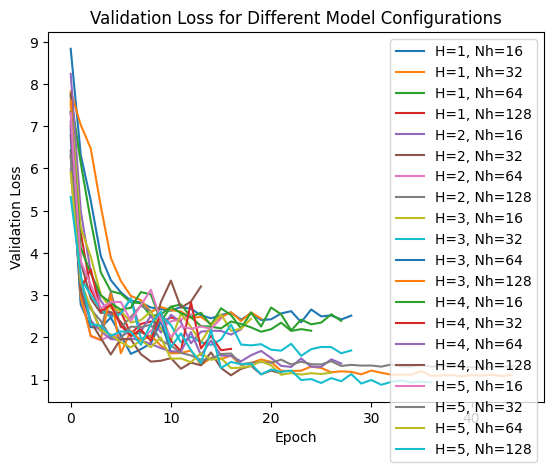

Model with H=1 and Nh=16:
MSE: 2.396841287612915
MAE: 2.3968409741358645
RMSE: 7.726203527008584
R-squared: 0.8961699204075375
MAPE: 36.50705784575653%
Model with H=1 and Nh=32:
MSE: 2.2629568576812744
MAE: 2.262956946879461
RMSE: 10.498903845120852
R-squared: 0.8588396760796375
MAPE: 31.424161927811546%
Model with H=1 and Nh=64:
MSE: 2.157341957092285
MAE: 2.1573425307145198
RMSE: 8.588559500198295
R-squared: 0.8987922784296003
MAPE: 30.41894666533857%
Model with H=1 and Nh=128:
MSE: 2.0608456134796143
MAE: 2.0608454095743305
RMSE: 10.034349287498738
R-squared: 0.8842222083464122
MAPE: 29.30140333523371%
Model with H=2 and Nh=16:
MSE: 1.880030870437622
MAE: 1.8800306114856231
RMSE: 7.059181920038436
R-squared: 0.9041933876243853
MAPE: 27.691143053166872%
Model with H=2 and Nh=32:
MSE: 2.081670045852661
MAE: 2.081669785392718
RMSE: 6.937930825727089
R-squared: 0.8832428588017602
MAPE: 35.57739740291802%
Model with H=2 and Nh=64:
MSE: 1.8833465576171875
MAE: 1.8833471561046773
RMSE: 5.7

In [6]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_1.add(tf.keras.layers.Dense(2, activation='softplus'))  

        # Compile the model
        model_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_1 = model_1.fit(X_train, y_train_1, epochs=100, batch_size=32, validation_data=(X_val, y_val_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_1[(H, Nh)] = history_1

        # Evaluate the model on the testing set
        predictions_1 = model_1.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_1 = model_1.evaluate(X_test, y_test_1)
        mses_1[(H, Nh)] = mse_1

        # Calculate Mean Absolute Error (MAE)
        mae_1 = mean_absolute_error(y_test_1, predictions_1)
        maes_1[(H, Nh)] = mae_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_1 = np.sqrt(mean_squared_error(y_test_1, predictions_1))
        rmses_1[(H, Nh)] = rmse_1

        # Calculate R-squared (R2) Score
        r2_1 = r2_score(y_test_1, predictions_1)
        r2_scores_1[(H, Nh)] = r2_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_1 = np.mean(np.abs((y_test_1 - predictions_1) / y_test_1)) * 100
        mapes_1[(H, Nh)] = mape_1

# Plot the validation loss for each configuration
for (H, Nh), history_1 in histories_1.items():
    plt.plot(history_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# # Print the evaluation metrics for each configuration
# for (H, Nh), mse_1 in mses_1.items():
#     print(f'Model with H={H} and Nh={Nh}:')
#     print(f'MSE: {mse_1}')
#     print(f'MAE: {maes_1[(H, Nh)]}')
#     print(f'RMSE: {rmses_1[(H, Nh)]}')
#     print(f'R-squared: {r2_scores_1[(H, Nh)]}')
#     print(f'MAPE: {mapes_1[(H, Nh)]}%')


In [7]:
# Rank combinations based on their MSE values
ranked_combinations_1 = sorted(mses_1.items(), key=lambda x: x[1])

# Print ranked combinations
print('delta_current,delta_voltage')
for idx, ((H, Nh), mse_1) in enumerate(ranked_combinations_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_1}")


Rank 1: Combination H=5, Nh=128 - MSE: 0.9137723445892334
Rank 2: Combination H=3, Nh=128 - MSE: 1.0225193500518799
Rank 3: Combination H=4, Nh=128 - MSE: 1.0947929620742798
Rank 4: Combination H=5, Nh=64 - MSE: 1.1458595991134644
Rank 5: Combination H=5, Nh=32 - MSE: 1.3010549545288086
Rank 6: Combination H=4, Nh=64 - MSE: 1.3130419254302979
Rank 7: Combination H=3, Nh=32 - MSE: 1.5623023509979248
Rank 8: Combination H=3, Nh=64 - MSE: 1.645480990409851
Rank 9: Combination H=4, Nh=32 - MSE: 1.6794713735580444
Rank 10: Combination H=2, Nh=16 - MSE: 1.880030870437622
Rank 11: Combination H=2, Nh=64 - MSE: 1.8833465576171875
Rank 12: Combination H=3, Nh=16 - MSE: 1.9408729076385498
Rank 13: Combination H=5, Nh=16 - MSE: 1.9793410301208496
Rank 14: Combination H=1, Nh=128 - MSE: 2.0608456134796143
Rank 15: Combination H=2, Nh=32 - MSE: 2.081670045852661
Rank 16: Combination H=4, Nh=16 - MSE: 2.0901670455932617
Rank 17: Combination H=1, Nh=64 - MSE: 2.157341957092285
Rank 18: Combination H=

## Pl_s1,Pl_s2

In [8]:
# Extract output (ripples)
# y_1 = df_1[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset
y_2 = df[["Pl_s1"]].values  # Adjust column names as per your dataset

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train_2, y_temp_2 = train_test_split(X_scaled, y_2, test_size=0.3, random_state=42)
X_val, X_test, y_val_2, y_test_2 = train_test_split(X_temp, y_temp_2, test_size=0.5, random_state=42)


histories_2 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_2 = {}
maes_2 = {}
rmses_2= {}
r2_scores_2 = {}
mapes_2 = {}

Epoch 1/100, Loss: 0.36072638630867004, Val Loss: 0.10334599763154984
Epoch 2/100, Loss: 0.11313338577747345, Val Loss: 0.07812751829624176
Epoch 3/100, Loss: 0.10249606519937515, Val Loss: 0.07163165509700775
Epoch 4/100, Loss: 0.09518174082040787, Val Loss: 0.060660284012556076
Epoch 5/100, Loss: 0.09498485922813416, Val Loss: 0.0844993144273758
Epoch 6/100, Loss: 0.09336527436971664, Val Loss: 0.06573385745286942
Epoch 7/100, Loss: 0.09408286213874817, Val Loss: 0.05943862348794937
Epoch 8/100, Loss: 0.09004678577184677, Val Loss: 0.05693189054727554
Epoch 9/100, Loss: 0.08982283622026443, Val Loss: 0.07319483906030655
Epoch 10/100, Loss: 0.09120083600282669, Val Loss: 0.0591944195330143
Epoch 11/100, Loss: 0.0879046618938446, Val Loss: 0.06341055035591125
Epoch 12/100, Loss: 0.08785971999168396, Val Loss: 0.06329061836004257
Epoch 13/100, Loss: 0.08720581978559494, Val Loss: 0.055156175047159195
Epoch 14/100, Loss: 0.0859466940164566, Val Loss: 0.06963422894477844
Epoch 15/100, Los

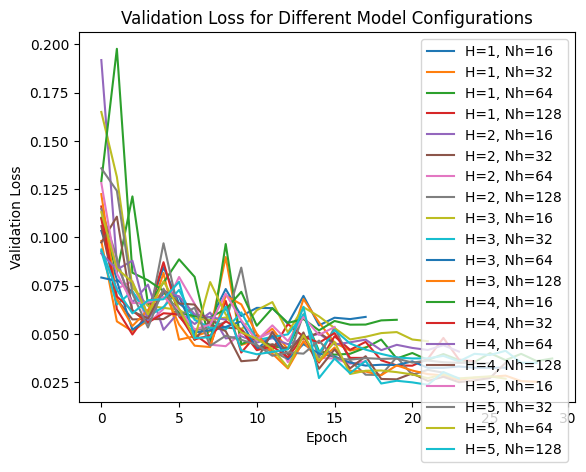

Model with H=1 and Nh=16:
MSE: 0.05536656081676483
MAE: 0.0553665485325286
RMSE: 0.08625863203837222
R-squared: 0.9581864352311295
MAPE: 2.8685196117462026%
Model with H=1 and Nh=32:
MSE: 0.04272186756134033
MAE: 0.042721867921147565
RMSE: 0.0594952170978107
R-squared: 0.9801081045154828
MAPE: 2.219134326852419%
Model with H=1 and Nh=64:
MSE: 0.03500960022211075
MAE: 0.03500960713578167
RMSE: 0.05348378761801331
R-squared: 0.9839248004541717
MAPE: 1.86872723336935%
Model with H=1 and Nh=128:
MSE: 0.03424802049994469
MAE: 0.034248029674620685
RMSE: 0.05069016491041913
R-squared: 0.9855602567988043
MAPE: 1.784292792136755%
Model with H=2 and Nh=16:
MSE: 0.041924212127923965
MAE: 0.041924208999662343
RMSE: 0.05998275698901176
R-squared: 0.9797807562323314
MAPE: 2.2580697266041385%
Model with H=2 and Nh=32:
MSE: 0.041316017508506775
MAE: 0.041316019445488725
RMSE: 0.0594238626709242
R-squared: 0.9801557898159642
MAPE: 2.308535320601994%
Model with H=2 and Nh=64:
MSE: 0.035733290016651154
M

In [9]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_2 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_2.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_2.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_2.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_2.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_2.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_2.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_2 = model_2.fit(X_train, y_train_2, epochs=100, batch_size=32, validation_data=(X_val, y_val_2), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_2[(H, Nh)] = history_2

        # Evaluate the model on the testing set
        predictions_2 = model_2.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_2 = model_2.evaluate(X_test, y_test_2)
        mses_2[(H, Nh)] = mse_2

        # Calculate Mean Absolute Error (MAE)
        mae_2 = mean_absolute_error(y_test_2, predictions_2)
        maes_2[(H, Nh)] = mae_2

        # Calculate Root Mean Squared Error (RMSE)
        rmse_2 = np.sqrt(mean_squared_error(y_test_2, predictions_2))
        rmses_2[(H, Nh)] = rmse_2

        # Calculate R-squared (R2) Score
        r2_2 = r2_score(y_test_2, predictions_2)
        r2_scores_2[(H, Nh)] = r2_2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_2 = np.mean(np.abs((y_test_2 - predictions_2) / y_test_2)) * 100
        mapes_2[(H, Nh)] = mape_2

# Plot the validation loss for each configuration
for (H, Nh), history_2 in histories_2.items():
    plt.plot(history_2.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# # Print the evaluation metrics for each configuration
# for (H, Nh), mse_2 in mses_2.items():
#     print(f'Model with H={H} and Nh={Nh}:')
#     print(f'MSE: {mse_2}')
#     print(f'MAE: {maes_2[(H, Nh)]}')
#     print(f'RMSE: {rmses_2[(H, Nh)]}')
#     print(f'R-squared: {r2_scores_2[(H, Nh)]}')
#     print(f'MAPE: {mapes_2[(H, Nh)]}%')


In [10]:
# Rank combinations based on their MSE values
ranked_combinations_2 = sorted(mses_2.items(), key=lambda x: x[1])

# Print ranked combinations
print('Pl_s1,Pl_s2')
for idx, ((H, Nh), mse_2) in enumerate(ranked_combinations_2, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_2}")


Rank 1: Combination H=5, Nh=128 - MSE: 0.024622047320008278
Rank 2: Combination H=4, Nh=128 - MSE: 0.025334201753139496
Rank 3: Combination H=5, Nh=64 - MSE: 0.026649827137589455
Rank 4: Combination H=3, Nh=128 - MSE: 0.026885157451033592
Rank 5: Combination H=2, Nh=128 - MSE: 0.029159722849726677
Rank 6: Combination H=3, Nh=64 - MSE: 0.03250487893819809
Rank 7: Combination H=1, Nh=128 - MSE: 0.03424802049994469
Rank 8: Combination H=1, Nh=64 - MSE: 0.03500960022211075
Rank 9: Combination H=5, Nh=32 - MSE: 0.03555101528763771
Rank 10: Combination H=2, Nh=64 - MSE: 0.035733290016651154
Rank 11: Combination H=3, Nh=32 - MSE: 0.036187559366226196
Rank 12: Combination H=4, Nh=32 - MSE: 0.03858976066112518
Rank 13: Combination H=2, Nh=32 - MSE: 0.041316017508506775
Rank 14: Combination H=2, Nh=16 - MSE: 0.041924212127923965
Rank 15: Combination H=1, Nh=32 - MSE: 0.04272186756134033
Rank 16: Combination H=3, Nh=16 - MSE: 0.04574361816048622
Rank 17: Combination H=5, Nh=16 - MSE: 0.0463169291

## Pl_C

In [ ]:
# Extract output (ripples)
# y_1 = df_1[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset
y_3 = df[["Pl_C"]].values
# Define custom scaling ranges for each input feature

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train_3, y_temp_3     = train_test_split(X_scaled, y_3, test_size=0.3, random_state=42)
X_val, X_test, y_val_3, y_test_3 = train_test_split(X_temp, y_temp_3, test_size=0.5, random_state=42)

histories_3 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_3 = {}
maes_3 = {}
rmses_3= {}
r2_scores_3 = {}
mapes_3 = {}

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_3 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_3.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_3.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_3.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_3.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_3.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_3.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_3 = model_3.fit(X_train, y_train_3, epochs=100, batch_size=32, validation_data=(X_val, y_val_3), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_1[(H, Nh)] = history_3

        # Evaluate the model on the testing set
        predictions_3 = model_3.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_3 = model_3.evaluate(X_test, y_test_3)
        mses_3[(H, Nh)] = mse_3

        # Calculate Mean Absolute Error (MAE)
        mae_3 = mean_absolute_error(y_test_3, predictions_3)
        maes_3[(H, Nh)] = mae_3

        # Calculate Root Mean Squared Error (RMSE)
        rmse_3 = np.sqrt(mean_squared_error(y_test_3, predictions_3))
        rmses_3[(H, Nh)] = rmse_3

        # Calculate R-squared (R2) Score
        r2_3 = r2_score(y_test_3, predictions_3)
        r2_scores_3[(H, Nh)] = r2_3

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_3 = np.mean(np.abs((y_test_3 - predictions_3) / y_test_3)) * 100
        mapes_3[(H, Nh)] = mape_3

# Plot the validation loss for each configuration
for (H, Nh), history_3 in histories_3.items():
    plt.plot(history_3.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# # Print the evaluation metrics for each configuration
# for (H, Nh), mse_1 in mses_1.items():
#     print(f'Model with H={H} and Nh={Nh}:')
#     print(f'MSE: {mse_1}')
#     print(f'MAE: {maes_1[(H, Nh)]}')
#     print(f'RMSE: {rmses_1[(H, Nh)]}')
#     print(f'R-squared: {r2_scores_1[(H, Nh)]}')
#     print(f'MAPE: {mapes_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_3 = sorted(mses_3.items(), key=lambda x: x[1])

# Print ranked combinations
print('Pl_C')
for idx, ((H, Nh), mse_3) in enumerate(ranked_combinations_3, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_3}")


## Pl_L_Cu

In [ ]:
# Extract output (ripples)
# y_1 = df_1[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset
y_4 = df[["Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train_4, y_temp_4 = train_test_split(X_scaled, y_4, test_size=0.3, random_state=42)
X_val, X_test, y_val_4, y_test_4 = train_test_split(X_temp, y_temp_4, test_size=0.5, random_state=42)


histories_4 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_4 = {}
maes_4 = {}
rmses_4= {}
r2_scores_4 = {}
mapes_4 = {}

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_4 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_4.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_4.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_4.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_4.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_4.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_4.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_4 = model_4.fit(X_train, y_train_4, epochs=100, batch_size=32, validation_data=(X_val, y_val_4), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_4[(H, Nh)] = history_4

        # Evaluate the model on the testing set
        predictions_4 = model_4.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_4 = model_4.evaluate(X_test, y_test_4)
        mses_4[(H, Nh)] = mse_4

        # Calculate Mean Absolute Error (MAE)
        mae_4 = mean_absolute_error(y_test_4, predictions_4)
        maes_4[(H, Nh)] = mae_4

        # Calculate Root Mean Squared Error (RMSE)
        rmse_4 = np.sqrt(mean_squared_error(y_test_4, predictions_4))
        rmses_4[(H, Nh)] = rmse_4

        # Calculate R-squared (R2) Score
        r2_4 = r2_score(y_test_4, predictions_4)
        r2_scores_4[(H, Nh)] = r2_4

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_4 = np.mean(np.abs((y_test_4 - predictions_4) / y_test_4)) * 100
        mapes_4[(H, Nh)] = mape_4

# Plot the validation loss for each configuration
for (H, Nh), history_4 in histories_4.items():
    plt.plot(history_4.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# # Print the evaluation metrics for each configuration
# for (H, Nh), mse_2 in mses_2.items():
#     print(f'Model with H={H} and Nh={Nh}:')
#     print(f'MSE: {mse_2}')
#     print(f'MAE: {maes_2[(H, Nh)]}')
#     print(f'RMSE: {rmses_2[(H, Nh)]}')
#     print(f'R-squared: {r2_scores_2[(H, Nh)]}')
#     print(f'MAPE: {mapes_2[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_4 = sorted(mses_4.items(), key=lambda x: x[1])

# Print ranked combinations
print('Pl_L_Cu')
for idx, ((H, Nh), mse_4) in enumerate(ranked_combinations_4, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_4}")


## P_D

In [ ]:
# Extract output (ripples)
# y_1 = df_1[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset
y_5 = df[["P_D"]].values  # Adjust column names as per your dataset

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train_5, y_temp_5 = train_test_split(X_scaled, y_5, test_size=0.3, random_state=42)
X_val, X_test, y_val_5, y_test_5 = train_test_split(X_temp, y_temp_5, test_size=0.5, random_state=42)


histories_5 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_5 = {}
maes_5 = {}
rmses_5= {}
r2_scores_5 = {}
mapes_5 = {}

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_5 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_5.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_5.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_5.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_5.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_5.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_5.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_5 = model_5.fit(X_train, y_train_5, epochs=100, batch_size=32, validation_data=(X_val, y_val_5), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_5[(H, Nh)] = history_5

        # Evaluate the model on the testing set
        predictions_5 = model_5.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_5 = model_5.evaluate(X_test, y_test_5)
        mses_5[(H, Nh)] = mse_5

        # Calculate Mean Absolute Error (MAE)
        mae_5 = mean_absolute_error(y_test_5, predictions_5)
        maes_5[(H, Nh)] = mae_5

        # Calculate Root Mean Squared Error (RMSE)
        rmse_5 = np.sqrt(mean_squared_error(y_test_5, predictions_5))
        rmses_5[(H, Nh)] = rmse_5

        # Calculate R-squared (R2) Score
        r2_5 = r2_score(y_test_5, predictions_5)
        r2_scores_5[(H, Nh)] = r2_5

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_5 = np.mean(np.abs((y_test_5 - predictions_5) / y_test_5)) * 100
        mapes_5[(H, Nh)] = mape_5

# Plot the validation loss for each configuration
for (H, Nh), history_5 in histories_5.items():
    plt.plot(history_5.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# # Print the evaluation metrics for each configuration
# for (H, Nh), mse_2 in mses_2.items():
#     print(f'Model with H={H} and Nh={Nh}:')
#     print(f'MSE: {mse_2}')
#     print(f'MAE: {maes_2[(H, Nh)]}')
#     print(f'RMSE: {rmses_2[(H, Nh)]}')
#     print(f'R-squared: {r2_scores_2[(H, Nh)]}')
#     print(f'MAPE: {mapes_2[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_5 = sorted(mses_5.items(), key=lambda x: x[1])

# Print ranked combinations
print('P_D')
for idx, ((H, Nh), mse_5) in enumerate(ranked_combinations_5, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_5}")


# All

In [11]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_13x13x13x13.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling_1(X)


# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [16, 32, 64, 128]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 565.900634765625, Val Loss: 390.749267578125
Epoch 2/100, Loss: 371.32379150390625, Val Loss: 236.8061065673828
Epoch 3/100, Loss: 275.5099182128906, Val Loss: 173.08863830566406
Epoch 4/100, Loss: 215.4322967529297, Val Loss: 124.58826446533203
Epoch 5/100, Loss: 172.3015899658203, Val Loss: 86.86078643798828
Epoch 6/100, Loss: 137.8248291015625, Val Loss: 60.90095138549805
Epoch 7/100, Loss: 117.27175903320312, Val Loss: 46.08729934692383
Epoch 8/100, Loss: 99.54536437988281, Val Loss: 32.0854606628418
Epoch 9/100, Loss: 83.18775939941406, Val Loss: 25.72692108154297
Epoch 10/100, Loss: 73.19153594970703, Val Loss: 21.097576141357422
Epoch 11/100, Loss: 68.1574478149414, Val Loss: 19.471538543701172
Epoch 12/100, Loss: 60.12403106689453, Val Loss: 18.97463035583496
Epoch 13/100, Loss: 54.0766487121582, Val Loss: 18.481361389160156
Epoch 14/100, Loss: 54.00340270996094, Val Loss: 19.515470504760742
Epoch 15/100, Loss: 45.961448669433594, Val Loss: 22.978830337524414

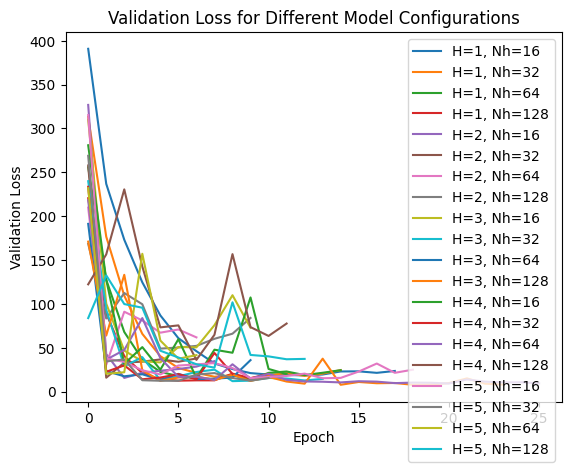

Model with H=1 and Nh=16:
MSE: 22.04623794555664
MAE: 1.49204228484741
RMSE: 4.695341620422116
R-squared: 0.30477123782047005
MAPE: 58.755777678336685%
Model with H=1 and Nh=32:
MSE: 18.63448715209961
MAE: 1.3430955286094957
RMSE: 4.316767910473419
R-squared: 0.42946650239061723
MAPE: 51.25038385068314%
Model with H=1 and Nh=64:
MSE: 14.220601081848145
MAE: 1.099455747921728
RMSE: 3.7710209359846116
R-squared: 0.45326723987663936
MAPE: 40.859321770046435%
Model with H=1 and Nh=128:
MSE: 16.433502197265625
MAE: 1.18228823396158
RMSE: 4.053826173367729
R-squared: 0.49534266562137463
MAPE: 42.98875120948942%
Model with H=2 and Nh=16:
MSE: 19.33310890197754
MAE: 1.2093462452457389
RMSE: 4.3969434571725605
R-squared: -0.07706226631836693
MAPE: 131.3669990703915%
Model with H=2 and Nh=32:
MSE: 19.515432357788086
MAE: 1.1834580886261992
RMSE: 4.417627867839395
R-squared: 0.13094389594573208
MAPE: 180.49182889555902%
Model with H=2 and Nh=64:
MSE: 24.721073150634766
MAE: 1.1920612450143773
RMS

In [12]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


In [13]:
# Rank combinations based on their MSE values
ranked_combinations = sorted(mses.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse) in enumerate(ranked_combinations, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse}")


Rank 1: Combination H=3, Nh=128 - MSE: 12.041635513305664
Rank 2: Combination H=5, Nh=32 - MSE: 13.951141357421875
Rank 3: Combination H=4, Nh=64 - MSE: 14.110830307006836
Rank 4: Combination H=1, Nh=64 - MSE: 14.220601081848145
Rank 5: Combination H=3, Nh=32 - MSE: 15.045110702514648
Rank 6: Combination H=1, Nh=128 - MSE: 16.433502197265625
Rank 7: Combination H=3, Nh=64 - MSE: 17.854820251464844
Rank 8: Combination H=4, Nh=16 - MSE: 18.353395462036133
Rank 9: Combination H=4, Nh=32 - MSE: 18.58150291442871
Rank 10: Combination H=1, Nh=32 - MSE: 18.63448715209961
Rank 11: Combination H=5, Nh=64 - MSE: 19.166242599487305
Rank 12: Combination H=2, Nh=16 - MSE: 19.33310890197754
Rank 13: Combination H=2, Nh=32 - MSE: 19.515432357788086
Rank 14: Combination H=5, Nh=16 - MSE: 20.053701400756836
Rank 15: Combination H=5, Nh=128 - MSE: 21.90174674987793
Rank 16: Combination H=1, Nh=16 - MSE: 22.04623794555664
Rank 17: Combination H=2, Nh=64 - MSE: 24.721073150634766
Rank 18: Combination H=4,

# Try spesific N and H

In [15]:
# Specify the combination you want to call
H = 7
Nh = 512

# Retrieve the model for the specified combination
selected_model_1 = histories_1[(H, Nh)].model
selected_model_1.save("model_7_512_13_13.h5")
# Use the trained model to make predictions on the testing set
predictions_1 = selected_model_1.predict(X_test)

# Evaluate the model on the testing set
mse_1 = selected_model_1.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse_1)

# Print the first few predictions
print("Predictions:")
print(predictions_1[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

 34/134 [======>.......................] - ETA: 0s

d:\Krishna\Python_3_92\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 0s 1ms/step - loss: 0.2632
Mean Squared Error on Testing Set: 0.26322445273399353
Predictions:
[[4.94520950e+00 6.25322044e-01 1.68957520e+00 1.68046486e+00
  2.01721862e-02 8.67017448e-01 1.18278064e-01]
 [1.83744469e+01 5.52549744e+00 1.34882081e+00 1.32561815e+00
  1.79472018e-03 2.01359794e-01 1.25890061e-01]
 [1.68494320e+01 2.72182584e+00 1.88195705e+00 1.87190425e+00
  8.98849592e-03 4.47230458e-01 1.21876158e-01]
 [4.47842789e+00 1.19853151e+00 2.08799934e+00 2.08096504e+00
  7.64500443e-03 8.53145063e-01 1.17788926e-01]
 [2.03854942e+01 6.47426367e+00 1.94576478e+00 1.93830419e+00
  2.34065540e-02 1.04791844e+00 3.53775956e-02]]
True Values:
[[4.76080528e+00 5.25655146e-01 1.67239255e+00 1.67239255e+00
  1.99805977e-02 9.73727435e-01 1.21483470e-01]
 [2.13022187e+01 4.20957287e+00 1.32108197e+00 1.32108197e+00
  9.90812382e-04 1.72777606e-01 1.30921004e-01]
 [1.65742053e+01 2.70162061e+00 1.91680832e+00 1.91680832e+00
  9.07691085e-03